In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
cwd = fr"C:\Users\juanb\Documents\BAVARIA\Data"

In [3]:
df_venta = pd.read_csv(fr"{cwd}\Input2_clientes_venta.csv", sep = ";")

In [4]:
df_venta["Fecha"] = pd.to_datetime(df_venta["Año"].astype(str) + df_venta["Mes"].map('{:02d}'.format), format="%Y%m")
df_venta

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Fecha
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,2019-05-01
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,2019-05-01
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,2019-05-01
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,2019-05-01
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,2020-08-01
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-07-01
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,2020-07-01
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,2020-09-01


In [5]:
df_clientes = pd.read_csv(fr"{cwd}\Input1_clientes_estructura.csv", sep = ";")
df_clientes

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


In [218]:
df_test = pd.read_csv(fr"{cwd}\Input3_clientes_test_4.csv", sep = ";")
df_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,0.390000,0.422045,0.528871,0.620000,0.610000
1,12,0.230000,0.750508,0.545422,0.120000,0.030000
2,14,0.680000,0.178546,0.553130,0.060000,0.060000
3,15,0.920000,0.178047,0.302522,0.300000,0.330000
4,18,0.480000,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...,...
9297,20186,0.030000,0.147069,0.159453,0.630000,0.590000
9298,20261,0.170000,0.049379,0.046851,0.900000,0.900000
9299,20309,0.059163,0.152190,0.085601,0.489594,0.418825
9300,20360,0.120000,0.033512,0.065089,0.880000,0.980000


## Producto 2

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, accuracy_score
import xgboost as xgb

In [276]:
df_prod_t = pd.read_pickle("df_prod2_t.pkl")
df_prod_t = pd.get_dummies(df_prod_t)
df_prod_t

,disc_ProdOt31,Volumen_ProdOt68,Volumen_ProdOt7,disc_ProdOt39,nr_ProdInno2,nr_ProdOt19,nr_ProdOt78,nr_ProdOt87,disc_Prod1,disc_ProdOt22,...,Gerencia2_Gerencia_2,Gerencia2_Gerencia_3,Gerencia2_Gerencia_4,Gerencia2_Gerencia_5,Gerencia2_Gerencia_6,Gerencia2_Gerencia_7,Gerencia2_Gerencia_8,Gerencia2_Gerencia_9,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0.021734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20917,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
20918,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
20919,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,0


In [220]:
df_prod = pd.read_pickle("df_prod2.pkl")
df_prod

,Prod2,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt83,nr_ProdOt84,nr_ProdOt85,nr_ProdOt87,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,Gerencia_3,Subcanal_1,Categoria_2,1,0.0,0.0,0.000000,0.136927,0.019561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,Gerencia_1,Subcanal_3,Categoria_1,1,0.0,0.0,0.004676,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4539,0.0,Gerencia_10,Subcanal_3,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4536,0.0,Gerencia_10,Subcanal_3,Categoria_2,1,0.0,0.0,0.000000,0.078244,0.039122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11769,0.0,Gerencia_3,Subcanal_3,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,Gerencia_1,Subcanal_10,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19714,0.0,Gerencia_1,Subcanal_8,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19702,0.0,Gerencia_3,Subcanal_21,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
df_pd = pd.get_dummies(df_prod)
df_pd

,Prod2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.136927,0.019561,0.205752,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
5843,0.0,0.0,0.0,0.004676,0.000000,0.000000,0.000000,0.046064,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4536,0.0,0.0,0.0,0.000000,0.078244,0.039122,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
11769,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
19714,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,1,0,0,0,1,0,0,0,1,0
19702,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [222]:
df_c = df_pd[df_pd.index.isin(df_test["Cliente"])]
df_c

,Prod2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.136927,0.019561,0.205752,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
4546,0.0,0.0,0.0,0.068584,0.019561,0.000000,0.467619,0.131105,0.130406,0.043469,...,0,0,0,0,1,0,0,0,0,1
3092,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.037410,0.038977,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
4535,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
18878,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
18996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0,1,0


In [253]:
df_true = df_pd[df_pd["Prod2"] == 1]
df_false = df_pd[df_pd["Prod2"] == 0]

In [254]:
df_false = df_false.sample(n=df_true.shape[0]*2)

In [255]:
df_resampled =df_true.append(df_false).sample(frac = 1) 
df_resampled

,Prod2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1
Cliente,,,,,,,,,,,,,,,,,,,,,
16323,0.0,0.000000,0.000000,0.009352,0.000000,0.0,0.000000,0.000000,0.000000,0.008694,...,0,0,0,0,1,0,0,0,0,1
11168,0.0,0.000000,0.000000,0.018705,0.000000,0.0,0.000000,0.000000,0.000000,0.008694,...,0,0,0,0,1,0,0,0,1,0
18568,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.205752,0.042520,0.000000,0.017388,...,0,0,0,1,0,0,0,0,1,0
8217,1.0,0.000000,0.139100,0.000000,0.000000,0.0,0.210429,0.023426,0.000000,0.069550,...,0,0,1,0,0,0,0,0,0,1
19466,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,1.0,0.000000,0.032602,0.019874,0.000000,0.0,0.064298,0.056694,0.000000,0.049989,...,0,0,0,0,1,0,0,0,0,1
10499,1.0,0.000000,0.021734,0.042086,0.097805,0.0,0.000000,0.014173,0.021734,0.017388,...,0,0,0,1,0,0,0,0,0,1
7080,1.0,0.000000,0.021734,0.374095,0.000000,0.0,0.137168,0.000000,0.000000,0.133304,...,0,0,0,0,1,0,0,0,0,1


In [256]:
X = df_resampled.drop(columns=["Prod2"])
Y = df_resampled[["Prod2"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Random Forest

In [257]:
clf = RandomForestClassifier()

In [258]:
clf.fit(X_train, y_train)

<ipython-input-258-4f66baab8f93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [259]:
clf.score(X_train, y_train)

0.9964221824686941

In [260]:
clf.score(X_test, y_test)

0.7857142857142857

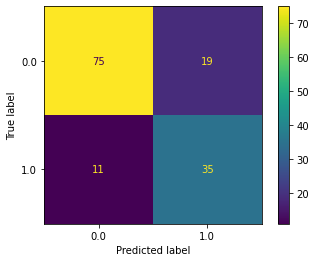

In [261]:
plot_confusion_matrix(clf, X_test, y_test)

In [262]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8442414431082331

In [263]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [264]:
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished
E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [266]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600)

In [241]:
import copy

In [267]:
best_rf = copy.deepcopy(rf_random.best_estimator_)

In [268]:
best_rf.score(X_train, y_train)

0.9749552772808586

In [269]:
best_rf.score(X_test, y_test)

0.8071428571428572

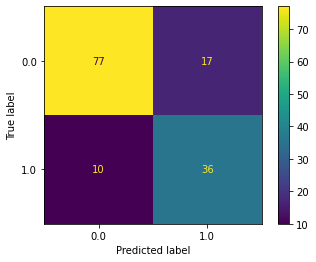

In [270]:
plot_confusion_matrix(best_rf, X_test, y_test)

In [271]:
roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

0.8515263644773358

### SVMC

In [30]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))

In [31]:
clf2.fit(X_train, y_train)

E:\Users\juanb\anaconda3\envs\bavaria\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [32]:
clf2.score(X_test, y_test)

0.7357142857142858

In [33]:
clf2.score(X_train, y_train)

0.8980322003577818

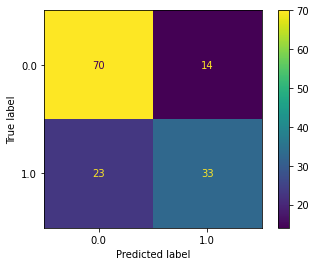

In [34]:
plot_confusion_matrix(clf2, X_test, y_test)

In [35]:
roc_auc_score(y_test, clf2.predict_proba(X_test)[:, 1])

0.8369472789115646

### XgBoost

In [36]:
param = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "binary:logistic", "nthread":2}
num_round = 100
train_mat = xgb.DMatrix(X_train, label=y_train)
test_mat = xgb.DMatrix(X_test, label=y_test)
all_mat = xgb.DMatrix(df_c.drop(columns=["Prod2"]), label=df_c[["Prod2"]])

evaluation = [(test_mat, "eval"), (train_mat, "train")]

In [37]:
bst = xgb.train(param, train_mat, num_round, evaluation)

[0]	eval-error:0.19286	train-error:0.11986
[1]	eval-error:0.17143	train-error:0.11807
[2]	eval-error:0.16429	train-error:0.11807
[3]	eval-error:0.16429	train-error:0.12165
[4]	eval-error:0.17143	train-error:0.11449
[5]	eval-error:0.17143	train-error:0.11270
[6]	eval-error:0.17857	train-error:0.11270
[7]	eval-error:0.17143	train-error:0.11449
[8]	eval-error:0.17857	train-error:0.11091
[9]	eval-error:0.19286	train-error:0.10912
[10]	eval-error:0.18571	train-error:0.10555
[11]	eval-error:0.19286	train-error:0.10733
[12]	eval-error:0.19286	train-error:0.10555
[13]	eval-error:0.19286	train-error:0.10376
[14]	eval-error:0.19286	train-error:0.10376
[15]	eval-error:0.19286	train-error:0.10197
[16]	eval-error:0.19286	train-error:0.10018
[17]	eval-error:0.19286	train-error:0.10018
[18]	eval-error:0.19286	train-error:0.09839
[19]	eval-error:0.18571	train-error:0.10018
[20]	eval-error:0.17857	train-error:0.09660
[21]	eval-error:0.19286	train-error:0.09660
[22]	eval-error:0.19286	train-error:0.0966

In [38]:
clf3 = xgb.XGBModel(**param)

In [39]:
clf3.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='logloss')

[0]	validation_0-logloss:0.54391	validation_1-logloss:0.56874
[1]	validation_0-logloss:0.46135	validation_1-logloss:0.49868
[2]	validation_0-logloss:0.41225	validation_1-logloss:0.46802
[3]	validation_0-logloss:0.38119	validation_1-logloss:0.44365
[4]	validation_0-logloss:0.35919	validation_1-logloss:0.43501
[5]	validation_0-logloss:0.34238	validation_1-logloss:0.42092
[6]	validation_0-logloss:0.33102	validation_1-logloss:0.41895
[7]	validation_0-logloss:0.31589	validation_1-logloss:0.42387
[8]	validation_0-logloss:0.30675	validation_1-logloss:0.42932
[9]	validation_0-logloss:0.29898	validation_1-logloss:0.44055
[10]	validation_0-logloss:0.29374	validation_1-logloss:0.44344
[11]	validation_0-logloss:0.28898	validation_1-logloss:0.44828
[12]	validation_0-logloss:0.28471	validation_1-logloss:0.45118
[13]	validation_0-logloss:0.27968	validation_1-logloss:0.45035
[14]	validation_0-logloss:0.27646	validation_1-logloss:0.45181
[15]	validation_0-logloss:0.27332	validation_1-logloss:0.45256
[1

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.300000012,
         max_delta_step=0, max_depth=2, min_child_weight=1,
         monotone_constraints='()', n_jobs=2, nthread=2, num_parallel_tree=1,
         objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
         scale_pos_weight=1, subsample=1, tree_method='exact',
         validate_parameters=1)

In [40]:
roc_auc_score(y_test, bst.predict(test_mat))

0.8374787414965986

In [41]:
roc_auc_score(y_test, clf3.predict(X_test))

0.8374787414965986

No Skill: ROC AUC=0.500
xgboost: ROC AUC=0.837
randomForest: ROC AUC=0.870


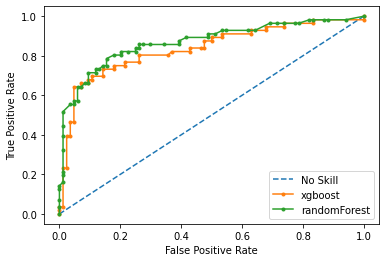

In [42]:
# roc curve and auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
rf_probs = clf.predict_proba(X_test)[:, 1]
xg_probs = clf3.predict(X_test)
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xg_auc = roc_auc_score(y_test, xg_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('xgboost: ROC AUC=%.3f' % (xg_auc))
print('randomForest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xg_fpr, xg_tpr, _ = roc_curve(y_test, xg_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xg_fpr, xg_tpr, marker='.', label='xgboost')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='randomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [233]:
clf.fit(X, Y)

<ipython-input-233-bb7a7515ddfc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


RandomForestClassifier()

In [272]:
best_rf.fit(X, Y)

<ipython-input-272-18f6596e70c4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf.fit(X, Y)


RandomForestClassifier(bootstrap=False, max_depth=70, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=600)

In [273]:
df_c["predicted"] = best_rf.predict_proba(df_c.drop(columns=["Prod2", "predicted"]))[:, 1]
df_c

<ipython-input-273-3470ba624c33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c["predicted"] = best_rf.predict_proba(df_c.drop(columns=["Prod2", "predicted"]))[:, 1]


,Prod2,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,Volumen_ProdOt1,Volumen_ProdOt10,Volumen_ProdOt11,Volumen_ProdOt12,...,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6,Nevera_0,Nevera_1,predicted
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,0.0,0.0,0.000000,0.136927,0.019561,0.205752,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0.382700
4539,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0.057604
4546,0.0,0.0,0.0,0.068584,0.019561,0.000000,0.467619,0.131105,0.130406,0.043469,...,0,0,0,1,0,0,0,0,1,0.671278
3092,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.037410,0.038977,0.000000,0.000000,...,0,1,0,0,0,0,0,0,1,0.150337
4535,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,0,1,0.025521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0.072274
18878,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,0,0,0,0,1,0,0.300935
18996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0.114252


In [274]:
df_a = df_test.copy().set_index("Cliente")
df_a["Marca2"] = df_c[["predicted"]]
df_a

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.390000,0.382700,0.528871,0.620000,0.610000
12,0.230000,0.773467,0.545422,0.120000,0.030000
14,0.680000,0.207081,0.553130,0.060000,0.060000
15,0.920000,0.172870,0.302522,0.300000,0.330000
18,0.480000,0.202367,0.303468,0.090000,0.180000
...,...,...,...,...,...
20186,0.030000,0.187400,0.159453,0.630000,0.590000
20261,0.170000,0.062150,0.046851,0.900000,0.900000
20309,0.059163,0.130227,0.085601,0.489594,0.418825


In [62]:
df_a.to_csv(fr"{cwd}\Input3_clientes_test.csv", sep = ";")

In [275]:
df_a.to_csv(fr"{cwd}\completo22.csv", sep = ",")

In [151]:
df_test.to_csv(fr"{cwd}\completo18.csv", sep = ",", index=False)

In [150]:
df_test

,Cliente,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
0,10,0.390000,0.422045,0.528871,0.620000,0.610000
1,12,0.230000,0.750508,0.545422,0.120000,0.030000
2,14,0.680000,0.178546,0.553130,0.060000,0.060000
3,15,0.920000,0.178047,0.302522,0.300000,0.330000
4,18,0.480000,0.216901,0.303468,0.090000,0.180000
...,...,...,...,...,...,...
9297,20186,0.030000,0.147069,0.159453,0.630000,0.590000
9298,20261,0.170000,0.049379,0.046851,0.900000,0.900000
9299,20309,0.059163,0.152190,0.085601,0.489594,0.418825
9300,20360,0.120000,0.033512,0.065089,0.880000,0.980000


In [277]:
df_prod_t
df_c2 = df_prod_t[df_prod_t.index.isin(df_test["Cliente"])].copy()

In [283]:
df_c2["predicted"] = best_rf.predict_proba(df_c2.loc[:, df_c.drop(columns=["Prod2", "predicted"]).columns])[:, 1]

In [284]:
df_b = df_test.copy().set_index("Cliente")
df_b["Marca2"] = df_c2[["predicted"]]
df_b

,Marca1,Marca2,Marca3,Marca_Inno1,Marca_Inno2
Cliente,,,,,
10,0.390000,0.384761,0.528871,0.620000,0.610000
12,0.230000,0.843000,0.545422,0.120000,0.030000
14,0.680000,0.272290,0.553130,0.060000,0.060000
15,0.920000,0.337958,0.302522,0.300000,0.330000
18,0.480000,0.263524,0.303468,0.090000,0.180000
...,...,...,...,...,...
20186,0.030000,0.149036,0.159453,0.630000,0.590000
20261,0.170000,0.062074,0.046851,0.900000,0.900000
20309,0.059163,0.073033,0.085601,0.489594,0.418825


In [285]:
df_b.to_csv(fr"{cwd}\completo27.csv", sep = ",")

In [286]:
df_prod

,Prod2,Gerencia2,SubCanal2,Categoria,Nevera,Volumen_Prod1,Volumen_Prod2,Volumen_Prod3,Volumen_ProdInno1,Volumen_ProdInno2,...,nr_ProdOt83,nr_ProdOt84,nr_ProdOt85,nr_ProdOt87,nr_ProdOt88,nr_ProdOt89,nr_ProdOt9,nr_ProdOt91,nr_ProdOt92,nr_ProdOt93
Cliente,,,,,,,,,,,,,,,,,,,,,
10,0.0,Gerencia_3,Subcanal_1,Categoria_2,1,0.0,0.0,0.000000,0.136927,0.019561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5843,0.0,Gerencia_1,Subcanal_3,Categoria_1,1,0.0,0.0,0.004676,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4539,0.0,Gerencia_10,Subcanal_3,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4536,0.0,Gerencia_10,Subcanal_3,Categoria_2,1,0.0,0.0,0.000000,0.078244,0.039122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11769,0.0,Gerencia_3,Subcanal_3,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19334,0.0,Gerencia_1,Subcanal_10,Categoria_2,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19714,0.0,Gerencia_1,Subcanal_8,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19702,0.0,Gerencia_3,Subcanal_21,Categoria_3,0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [290]:
df_b.to_csv(fr"{cwd}\Input3_clientes_test_5.csv", sep = ";")

In [289]:
#with open('model2.pkl', 'wb') as f:
#    pickle.dump(best_rf, f)

In [288]:
#import pickle

In [313]:
max(best_rf.feature_importances_)

0.07858867487628449

In [315]:
a = list(zip(df_c.drop(columns=["Prod2", "predicted"]).columns, best_rf.feature_importances_))
a.sort(key=lambda x:x[1], reverse=True)
a

[('Volumen_Prod2', 0.07858867487628449),
 ('nr_Prod2', 0.07579107256329085),
 ('disc_Prod2', 0.06045727469941046),
 ('Volumen_ProdOt8', 0.04109224142010981),
 ('nr_ProdOt8', 0.03371813426758052),
 ('nr_ProdOt19', 0.02727890891628585),
 ('disc_ProdOt8', 0.026568382573725985),
 ('Volumen_ProdOt19', 0.02466211864340453),
 ('nr_ProdOt6', 0.021043736157401675),
 ('Volumen_ProdOt6', 0.020664805896643317),
 ('Volumen_ProdOt7', 0.02062853834804469),
 ('nr_Prod3', 0.018418833373671315),
 ('Volumen_ProdOt3', 0.018410612263424414),
 ('Volumen_Prod3', 0.018246257601013265),
 ('nr_ProdOt7', 0.01788297091162748),
 ('nr_ProdOt5', 0.016456220206381263),
 ('Volumen_ProdOt5', 0.015363449294787144),
 ('nr_ProdOt3', 0.015268918079271556),
 ('disc_ProdOt19', 0.015227426452836531),
 ('nr_ProdOt14', 0.01334342408113677),
 ('disc_ProdOt7', 0.012731843067993605),
 ('nr_ProdOt1', 0.012730959745664126),
 ('Volumen_ProdOt1', 0.011259764119411302),
 ('Volumen_ProdOt14', 0.01050658543745585),
 ('disc_ProdOt5', 0.01